## Metody Nieparametryczne w Statystyce
# Zadanie 1:
Za pomocą odpowiednich symulacji porównać moce testu Shapiro-Wilka, testu Kołmogorowa i testu 𝜒2 (z hipotezą główną, że cecha ma rozkład normalny) w przypadku, gdy dane pochodzą z rozkładu 𝑡-Studenta lub innej klasy rozkładów symetrycznych (uwaga: żeby wyniki były porównywalne trzeba pamiętać o standaryzacji danych).
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek

In [34]:
import numpy as np, pandas as pd
import math
from scipy.stats import kstest, shapiro, chisquare, norm
from sklearn import preprocessing
import matplotlib.pyplot as plt

2. Moce testów w zależności od liczby danych (5-100 wartości, stopnie swobody: 5)

In [62]:
results = pd.DataFrame(columns=["Kolmogorov-Smirnov", "Wilk-Shapiro", "Chi-Squared"])
buf = []

for m in range (5, 100): 
    #generowanie wektora z rozkładu normalnego o długości m
    xnorm = np.linspace(norm.ppf(0), norm.ppf(1), m)
    
    for i in range (0, 100):
        #generowanie wektora z rozkładu t-Studenta o długości m i standaryzacja
        x = preprocessing.scale(np.random.standard_t(5, m))

        #testy
        print(kstest(x, xnorm)[1], shapiro(x)[1])
        buf.append(kstest(x, xnorm, method='asymp')[1] < 0.05)
        buf.append(shapiro(x)[1] < 0.05)

        #przeksztalcenie danych do testu chi-kwadrat
        xcat = np.histogram(x, bins=round(math.sqrt(m)))[0]
        xnormcat = np.histogram(xnorm, bins=round(math.sqrt(m)))[0]

        xcatfreqs = xcat / np.sum(xcat)
        xnormcatfreqs = xnormcat / np.sum(xnormcat)
        print(chisquare(xcatfreqs, xnormcatfreqs)[1])
        buf.append(chisquare(xcatfreqs, xnormcatfreqs)[1] < 0.05)
    
    results.loc[m] = [ np.mean(buf[0::3]), np.mean(buf[1::3]), np.mean(buf[2::3]) ]    
    buf = []

results.plot(xlabel="Sample Count",ylabel="Test Power",legend=True)

c:\Users\macir\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\macir\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start


0.007936507936507936 0.11090489476919174


ValueError: autodetected range of [nan, nan] is not finite

3. Moce testów w zależności od liczby stopni swobody (3-25 stopni swobody, liczba danych: 25)

<Axes: xlabel='Sample Count', ylabel='Test Power'>

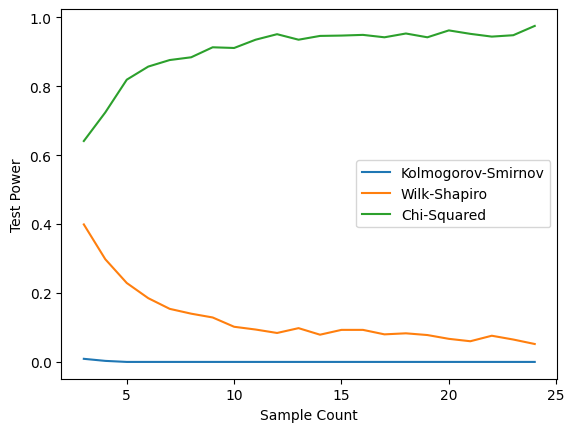

In [54]:
results = pd.DataFrame(columns=["Kolmogorov-Smirnov", "Wilk-Shapiro", "Chi-Squared"])
buf = []

for m in range (3, 25): 
    #generowanie wektora z rozkładu normalnego o długości 25
    xnorm = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 25)
    
    for i in range (0, 1000):
        #generowanie wektora z rozkładu t-Studenta o stopniach swobody m, 25 wartościach i standaryzacja
        x = preprocessing.scale(np.random.standard_t(m, 25))

        #testy
        buf.append(1 - kstest(x, xnorm)[1] < 0.05)
        buf.append(1 - shapiro(x)[1] < 0.05)

        #przeksztalcenie danych do testu chi-kwadrat
        xcat = np.histogram(x, bins=5)[0]
        xnormcat = np.histogram(xnorm, bins=5)[0]

        xcatfreqs = xcat / np.sum(xcat)
        xnormcatfreqs = xnormcat / np.sum(xnormcat)
        
        buf.append(1 - chisquare(xcatfreqs, xnormcatfreqs)[1] < 0.05)
    
    results.loc[m] = [ np.mean(buf[0::3]), np.mean(buf[1::3]), np.mean(buf[2::3]) ]    
    buf = []

results.plot(xlabel="Sample Count",ylabel="Test Power",legend=True)